In [1]:
suppressPackageStartupMessages({
  library(future)
  library(Seurat)
  library(tidyverse)
  library(Seurat)
  library(ggplot2)
  library(ggrastr)   # for geom_point_rast()
  library(ggrepel)   # for geom_text_repel()
  library(dplyr)
  library(forcats)
  library(pals)      # for glasbey palette (distinct, color-blind-friendly)
  library(stringr)  
  library(RColorBrewer) # For generating high-quality color palettes
  library(cowplot)      # For the 'theme_cowplot' (a clean, minimal theme)
  library(clusterProfiler)
  library(org.Hs.eg.db)
  library(enrichplot)
})

Warning message:
“package ‘future’ was built under R version 4.4.3”
Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Warning message:
“package ‘sp’ was built under R version 4.4.3”


Warning message:
“package ‘tidyverse’ was built under R version 4.4.3”
Warning message:
“package ‘tibble’ was built under R version 4.4.3”
Warning message:
“package ‘tidyr’ was built under R version 4.4.3”
Warning message:
“package ‘readr’ was built under R version 4.4.3”
Warning message:
“package ‘dplyr’ was built under R version 4.4.3”
Warning message:
“package ‘forcats’ was built under R version 4.4.3”
Warning message:
“package ‘lubridate’ was built under R version 4.4.3”
Warning message:
“package ‘ggrastr’ was built under R version 4.4.3”
Warning message:
“package ‘ggrepel’ was built under R version 4.4.3”
Warning message:
“package ‘pals’ was built under R version 4.4.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.4.3”
Warning message:
“package ‘cowplot’ was built under R version 4.4.3”


In [2]:
myeloid <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/myeloid_final_integrated.rds')
myeloid

An object of class Seurat 
69863 features across 104413 samples within 2 assays 
Active assay: SCT (31257 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [ ]:
# rm(myeloid)

In [3]:
myeloid@meta.data |> head()

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1,PRJNA1125010,1175,713,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,10.9787234,singlet,⋯,0,0,0,0,0,0,0,0,0,Myeloid
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1,PRJNA1125010,4284,2090,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.9607843,singlet,⋯,4,6,6,6,6,7,3,4,4,Myeloid
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1,PRJNA1125010,44655,6053,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,3.7509797,singlet,⋯,1,4,18,18,17,19,20,28,28,Myeloid
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1,PRJNA1125010,29414,6000,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.6114775,singlet,⋯,4,6,6,6,6,7,3,4,4,Myeloid
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1,PRJNA1125010,3246,1661,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.8934073,singlet,⋯,15,14,15,15,15,15,12,14,14,Myeloid
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1,PRJNA1125010,10869,3658,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,12.9358727,singlet,⋯,2,1,2,2,1,1,1,1,1,Myeloid


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



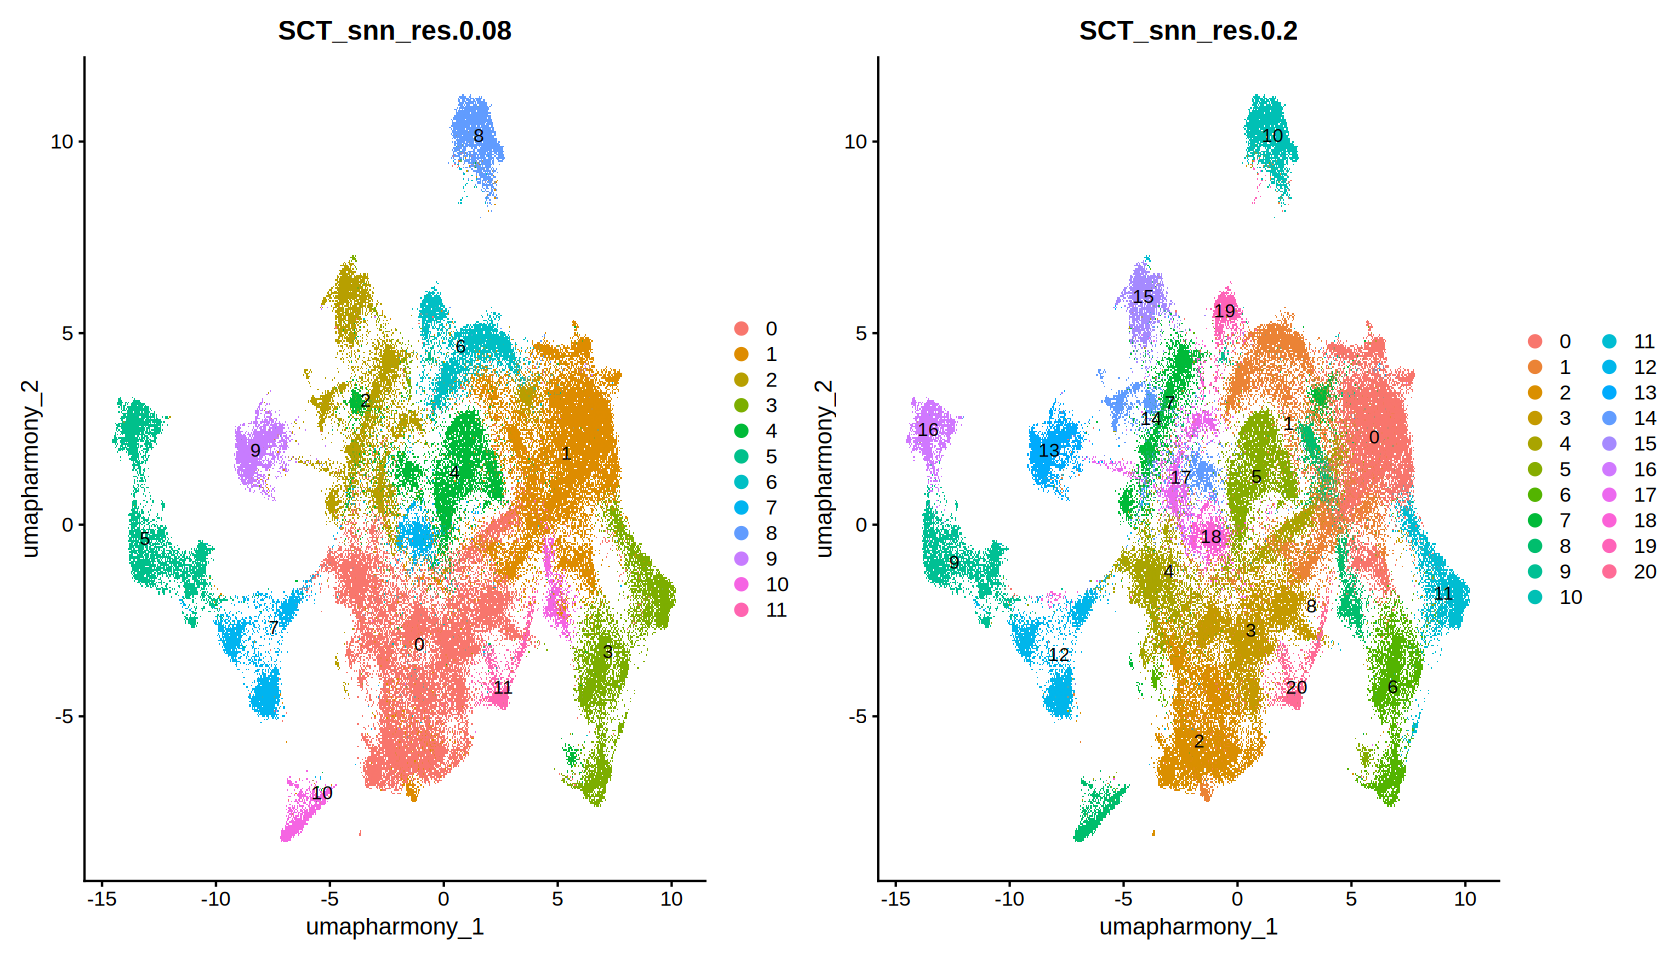

In [4]:
options(repr.plot.width = 14, repr.plot.height = 8)
p1 <- DimPlot(myeloid, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.08', label = TRUE)
p2 <- DimPlot(myeloid, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.2', label = TRUE)

p1 | p2 

In [5]:
myeloid <- PrepSCTFindMarkers(myeloid, assay = "SCT", verbose = TRUE)

Found 10 SCT models. Recorrecting SCT counts using minimum median counts: 1025



Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [6]:
Idents(myeloid) <- "SCT_snn_res.0.2"

In [7]:
# Find all markers for all clusters
all_markers <- FindAllMarkers(
  object = myeloid,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0



Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20



In [8]:
cluster0 <- all_markers %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1 <- all_markers %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2 <- all_markers %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3 <- all_markers %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4 <- all_markers %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5 <- all_markers %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6 <- all_markers %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))
cluster7 <- all_markers %>% filter(cluster == 7) %>% arrange(desc(avg_log2FC))
cluster8 <- all_markers %>% filter(cluster == 8) %>% arrange(desc(avg_log2FC))
cluster9 <- all_markers %>% filter(cluster == 9) %>% arrange(desc(avg_log2FC))
cluster10 <- all_markers %>% filter(cluster == 10) %>% arrange(desc(avg_log2FC))
cluster11 <- all_markers %>% filter(cluster == 11) %>% arrange(desc(avg_log2FC))
cluster12 <- all_markers %>% filter(cluster == 12) %>% arrange(desc(avg_log2FC))
cluster13 <- all_markers %>% filter(cluster == 13) %>% arrange(desc(avg_log2FC))
cluster14 <- all_markers %>% filter(cluster == 14) %>% arrange(desc(avg_log2FC))
cluster15 <- all_markers %>% filter(cluster == 15) %>% arrange(desc(avg_log2FC))
cluster16 <- all_markers %>% filter(cluster == 16) %>% arrange(desc(avg_log2FC))
cluster17 <- all_markers %>% filter(cluster == 17) %>% arrange(desc(avg_log2FC))
cluster18 <- all_markers %>% filter(cluster == 18) %>% arrange(desc(avg_log2FC))
cluster19 <- all_markers %>% filter(cluster == 19) %>% arrange(desc(avg_log2FC))
cluster20 <- all_markers %>% filter(cluster == 20) %>% arrange(desc(avg_log2FC))

In [9]:
Idents(myeloid) <- 'SCT_snn_res.0.08'

In [10]:
# Find all markers for all clusters
all_markers_2 <- FindAllMarkers(
  object = myeloid,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [11]:
cluster0_2 <- all_markers_2 %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1_2 <- all_markers_2 %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2_2 <- all_markers_2 %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3_2 <- all_markers_2 %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4_2 <- all_markers_2 %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5_2 <- all_markers_2 %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6_2 <- all_markers_2 %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))
cluster7_2 <- all_markers_2 %>% filter(cluster == 7) %>% arrange(desc(avg_log2FC))
cluster8_2 <- all_markers_2 %>% filter(cluster == 8) %>% arrange(desc(avg_log2FC))
cluster9_2 <- all_markers_2 %>% filter(cluster == 9) %>% arrange(desc(avg_log2FC))
cluster10_2 <- all_markers_2 %>% filter(cluster == 10) %>% arrange(desc(avg_log2FC))
cluster11_2 <- all_markers_2 %>% filter(cluster == 11) %>% arrange(desc(avg_log2FC))

In [12]:
Idents(myeloid) <- 'SCT_snn_res.0.06'

In [13]:
# Find all markers for all clusters
all_markers_3 <- FindAllMarkers(
  object = myeloid,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



In [14]:
cluster0_3 <- all_markers_3 %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1_3 <- all_markers_3 %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2_3 <- all_markers_3 %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3_3 <- all_markers_3 %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4_3 <- all_markers_3 %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5_3 <- all_markers_3 %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6_3 <- all_markers_3 %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))

In [15]:
Idents(myeloid) <- "SCT_snn_res.0.04"

In [16]:
# Find all markers for all clusters
all_markers_4 <- FindAllMarkers(
  object = myeloid,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster 0



Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6



In [17]:
cluster0_4 <- all_markers_4 %>% filter(cluster == 0) %>% arrange(desc(avg_log2FC))
cluster1_4 <- all_markers_4 %>% filter(cluster == 1) %>% arrange(desc(avg_log2FC))
cluster2_4 <- all_markers_4 %>% filter(cluster == 2) %>% arrange(desc(avg_log2FC))
cluster3_4 <- all_markers_4 %>% filter(cluster == 3) %>% arrange(desc(avg_log2FC))
cluster4_4 <- all_markers_4 %>% filter(cluster == 4) %>% arrange(desc(avg_log2FC))
cluster5_4 <- all_markers_4 %>% filter(cluster == 5) %>% arrange(desc(avg_log2FC))
cluster6_4 <- all_markers_4 %>% filter(cluster == 6) %>% arrange(desc(avg_log2FC))
cluster7_4 <- all_markers_4 %>% filter(cluster == 7) %>% arrange(desc(avg_log2FC))
cluster8_4 <- all_markers_4 %>% filter(cluster == 8) %>% arrange(desc(avg_log2FC))

In [18]:
p3 <- DimPlot(myeloid, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.06', label = TRUE)
p4 <- DimPlot(myeloid, reduction = 'umap.harmony', group.by = 'SCT_snn_res.0.04', label = TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [ ]:
# 01: 0.2
# 02: 0.08
# 03: 0.06
# 04: 0.04

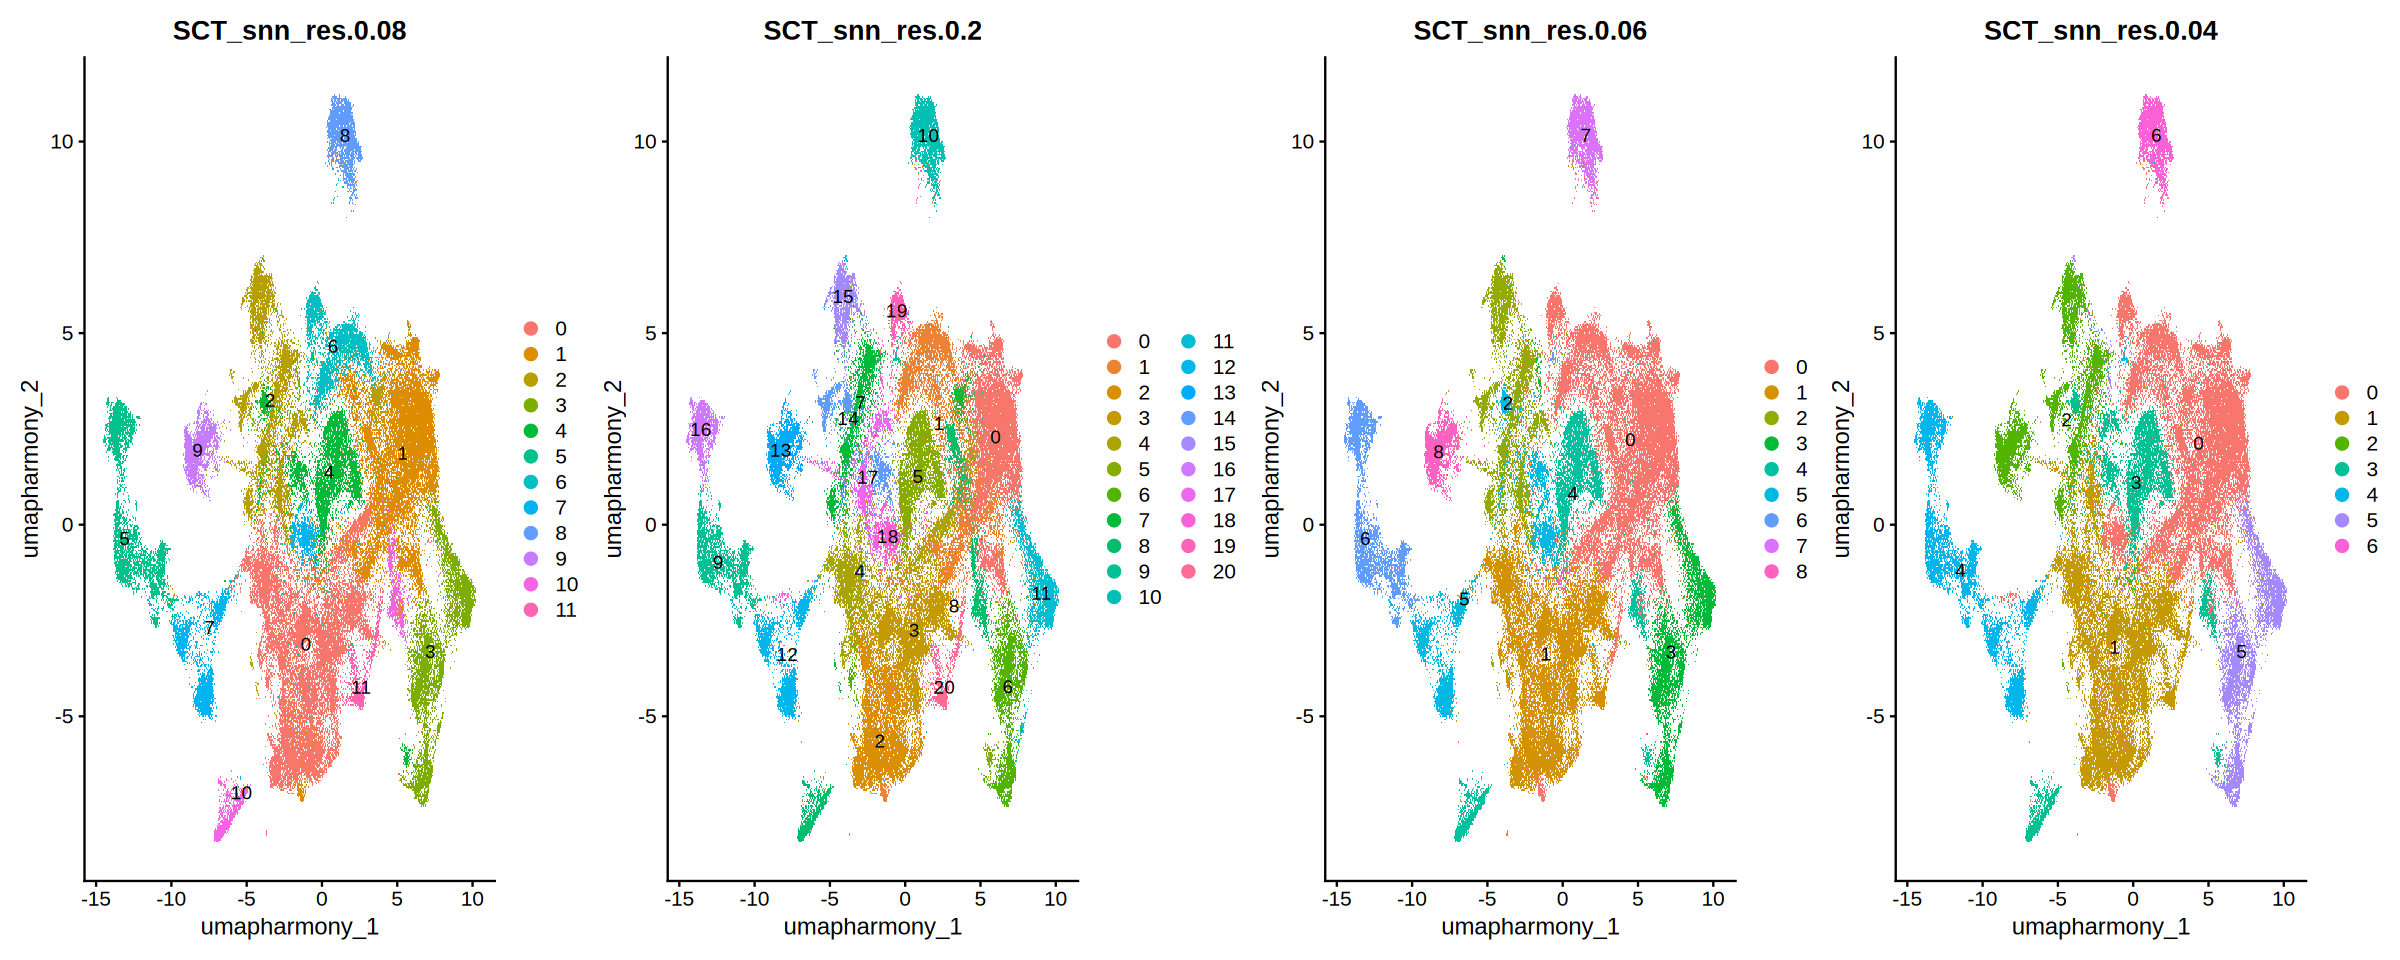

In [19]:
options(repr.plot.width = 20, repr.plot.height = 8)
p1 | p2 | p3 | p4

In [ ]:
# Apply for Res 0.08: Remove 8, 9, 10
# Cluster 0: 
# Cluster 1: Microglia/TAM
# Cluster 2: 
# Cluster 3: IFN_TAM 
# Cluster 4: Monocyte derived Macrophage
# Cluster 5: Neutrophil
# Cluster 6: SPP1_TAM
# Cluster 7: Mononcyte???
# Cluster 11: 


In [72]:
cluster3_2 |> head(20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CXCL10,0,4.993113,0.368,0.034,0,3,CXCL10
IFI6,0,2.935572,0.724,0.165,0,3,IFI6
TNFSF10,0,2.915651,0.399,0.079,0,3,TNFSF10
IFIT1,0,2.904111,0.537,0.095,0,3,IFIT1
IFIT2,0,2.875233,0.402,0.071,0,3,IFIT2
GBP5,0,2.847980,0.258,0.041,0,3,GBP5
IFITM1,0,2.831515,0.776,0.186,0,3,IFITM1
IFI27,0,2.797708,0.680,0.169,0,3,IFI27
RSAD2,0,2.791355,0.411,0.071,0,3,RSAD2


In [70]:
cluster0_2 |> head(20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
PDK4,0,3.418409,0.287,0.058,0,0,PDK4
CSGALNACT1,0,2.634497,0.284,0.062,0,0,CSGALNACT1
LDLRAD4,0,2.446905,0.538,0.156,0,0,LDLRAD4
FRMD4A,0,2.428221,0.472,0.146,0,0,FRMD4A
MERTK,0,2.419089,0.307,0.072,0,0,MERTK
PDE3B,0,2.412367,0.296,0.079,0,0,PDE3B
ST6GALNAC3,0,2.333753,0.285,0.087,0,0,ST6GALNAC3
LNCAROD,0,2.292213,0.262,0.073,0,0,LNCAROD
KCNQ3,0,2.282754,0.288,0.077,0,0,KCNQ3


In [ ]:
# Get top 6 markers from cluster 16
top_markers <- cluster1$gene[11:15]

Idents(myeloid) <- "SCT_snn_res.0.08"
# Create feature plots with custom settings
options(repr.plot.width = 24, repr.plot.height = 6)
p3 <- FeaturePlot(myeloid,
            features = c('CCR7', 'TRAC', 'CD3E2', 'LTB', 'TRBC2', 'TRBC1'),
            reduction = "umap.harmony",
            ncol = 6, label = TRUE)
p3

In [65]:
# Range
# top_markers <- cluster1$gene[1:15]
top_markers <- c('CD163', 'CD68', 'CD14', 'CD74')
# Flatten the markers for DotPlot
markers_genes <- unlist(top_markers)
markers_genes <- make.unique(markers_genes)

# Set factor levels in the order of your original markers vector
markers_genes <- factor(markers_genes, levels = markers_genes)

# Create a mapping from gene -> "Cluster0:Gene" label
label_map <- setNames(
  paste0("ClusterX:", markers_genes),
  markers_genes
)

In [23]:
Idents(myeloid) <- "SCT_snn_res.0.08"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


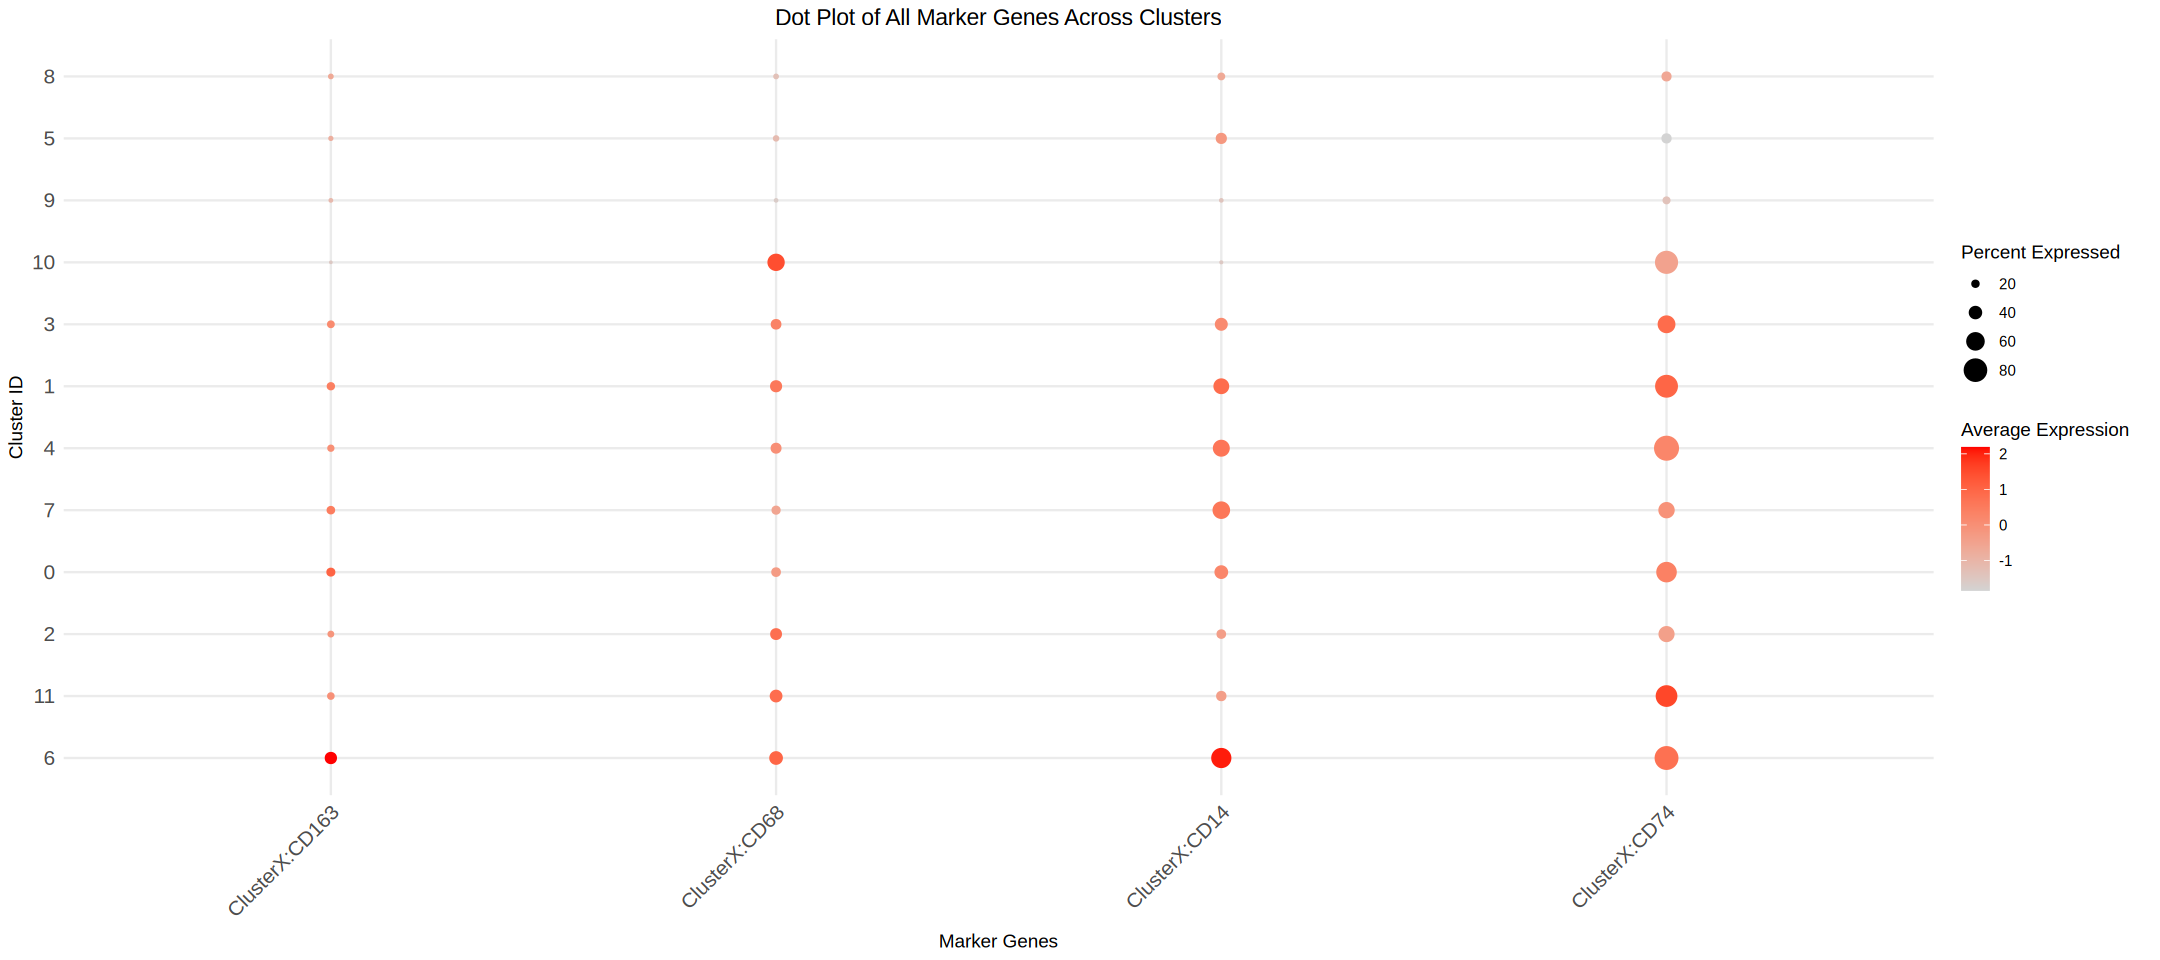

In [66]:
options(repr.plot.width = 18, repr.plot.height = 8)

library(Seurat)
library(ggplot2)

p5 <- DotPlot(myeloid, features = markers_genes, cluster.idents = TRUE) +
  scale_color_gradient(low = "lightgrey", high = "red") +
  theme_minimal() +
  xlab("Marker Genes") +
  ylab("Cluster ID") +
  ggtitle("Dot Plot of All Marker Genes Across Clusters") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    plot.title  = element_text(hjust = 0.5)
  ) +
  # Override labels so "CD3D" is displayed as "T_cells:CD3D", etc.
  scale_x_discrete(labels = label_map)

# Print the plot
p5

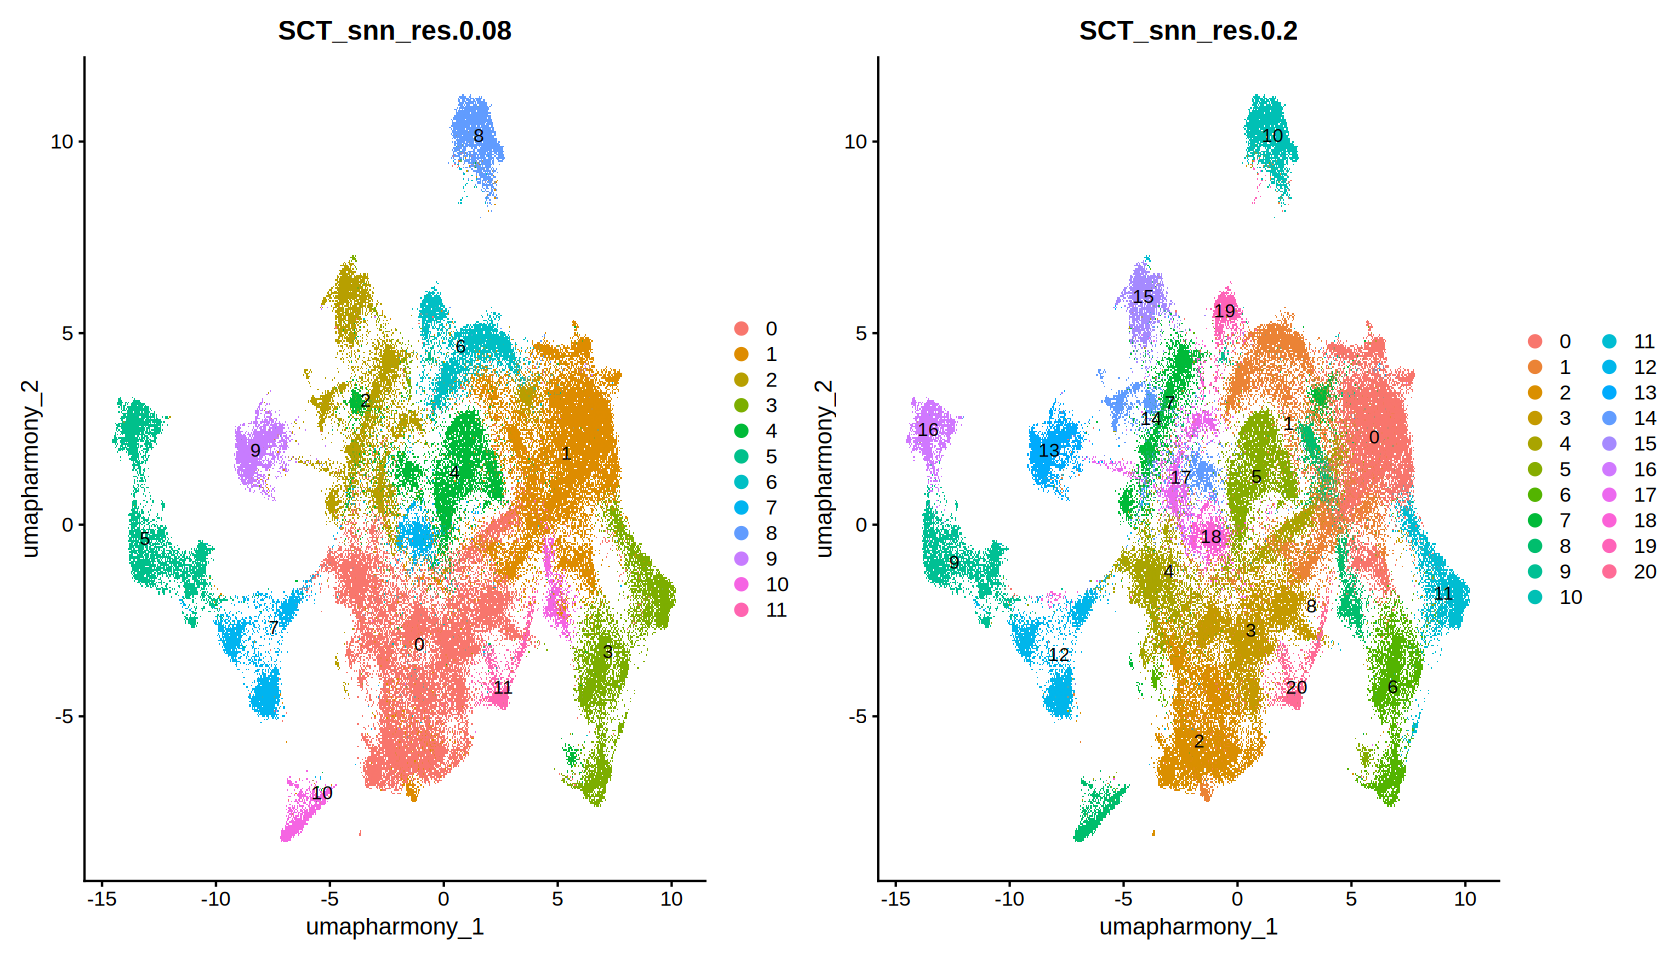

In [67]:
options(repr.plot.width = 14, repr.plot.height = 8)
p1 | p2

In [24]:
cluster0_genes <- all_markers |> filter(cluster == 0 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster1_genes <- all_markers |> filter(cluster == 1 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster2_genes <- all_markers |> filter(cluster == 2 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster3_genes <- all_markers |> filter(cluster == 3 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster4_genes <- all_markers |> filter(cluster == 4 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster5_genes <- all_markers |> filter(cluster == 5 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster6_genes <- all_markers |> filter(cluster == 6 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster7_genes <- all_markers |> filter(cluster == 7 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster8_genes <- all_markers |> filter(cluster == 8 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster9_genes <- all_markers |> filter(cluster == 9 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster10_genes <- all_markers |> filter(cluster == 10 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster11_genes <- all_markers |> filter(cluster == 11 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster12_genes <- all_markers |> filter(cluster == 12 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster13_genes <- all_markers |> filter(cluster == 13 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster14_genes <- all_markers |> filter(cluster == 14 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster15_genes <- all_markers |> filter(cluster == 15 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene) 
cluster16_genes <- all_markers |> filter(cluster == 16 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster17_genes <- all_markers |> filter(cluster == 17 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster18_genes <- all_markers |> filter(cluster == 18 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster19_genes <- all_markers |> filter(cluster == 19 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster20_genes <- all_markers |> filter(cluster == 20 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)

In [27]:
cluster0_2_genes <- all_markers_2 |> filter(cluster == 0 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster1_2_genes <- all_markers_2 |> filter(cluster == 1 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster2_2_genes <- all_markers_2 |> filter(cluster == 2 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster3_2_genes <- all_markers_2 |> filter(cluster == 3 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster4_2_genes <- all_markers_2 |> filter(cluster == 4 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster5_2_genes <- all_markers_2 |> filter(cluster == 5 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster6_2_genes <- all_markers_2 |> filter(cluster == 6 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster7_2_genes <- all_markers_2 |> filter(cluster == 7 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster8_2_genes <- all_markers_2 |> filter(cluster == 8 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster9_2_genes <- all_markers_2 |> filter(cluster == 9 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster10_2_genes <- all_markers_2 |> filter(cluster == 10 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)
cluster11_2_genes <- all_markers_2 |> filter(cluster == 11 & p_val_adj < 0.05 & avg_log2FC > 1) |> pull(gene)

In [61]:
# Convert gene symbols to Entrez IDs
entrez_ids <- bitr(
    cluster2_2_genes,
    fromType = "SYMBOL", 
    toType = "ENTREZID", 
    OrgDb = org.Hs.eg.db)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster2_2_genes, fromType = "SYMBOL", toType = "ENTREZID", :
“1.52% of input gene IDs are fail to map...”


In [62]:
entrez_ids |> head()

,SYMBOL,ENTREZID
,<chr>,<chr>
1,MIF,4282
2,PLIN2,123
3,LDHA,3939
4,CSTB,1476
5,LGALS3,3958
6,GPNMB,10457


In [63]:
# GO enrichment analysis
go_result <- enrichGO(gene = entrez_ids$ENTREZID,
                                         OrgDb = org.Hs.eg.db,
                                         ont = "BP",  # Biological Process
                                         pAdjustMethod = "BH",
                                         pvalueCutoff = 0.05,
                                         qvalueCutoff = 0.05
                                         )

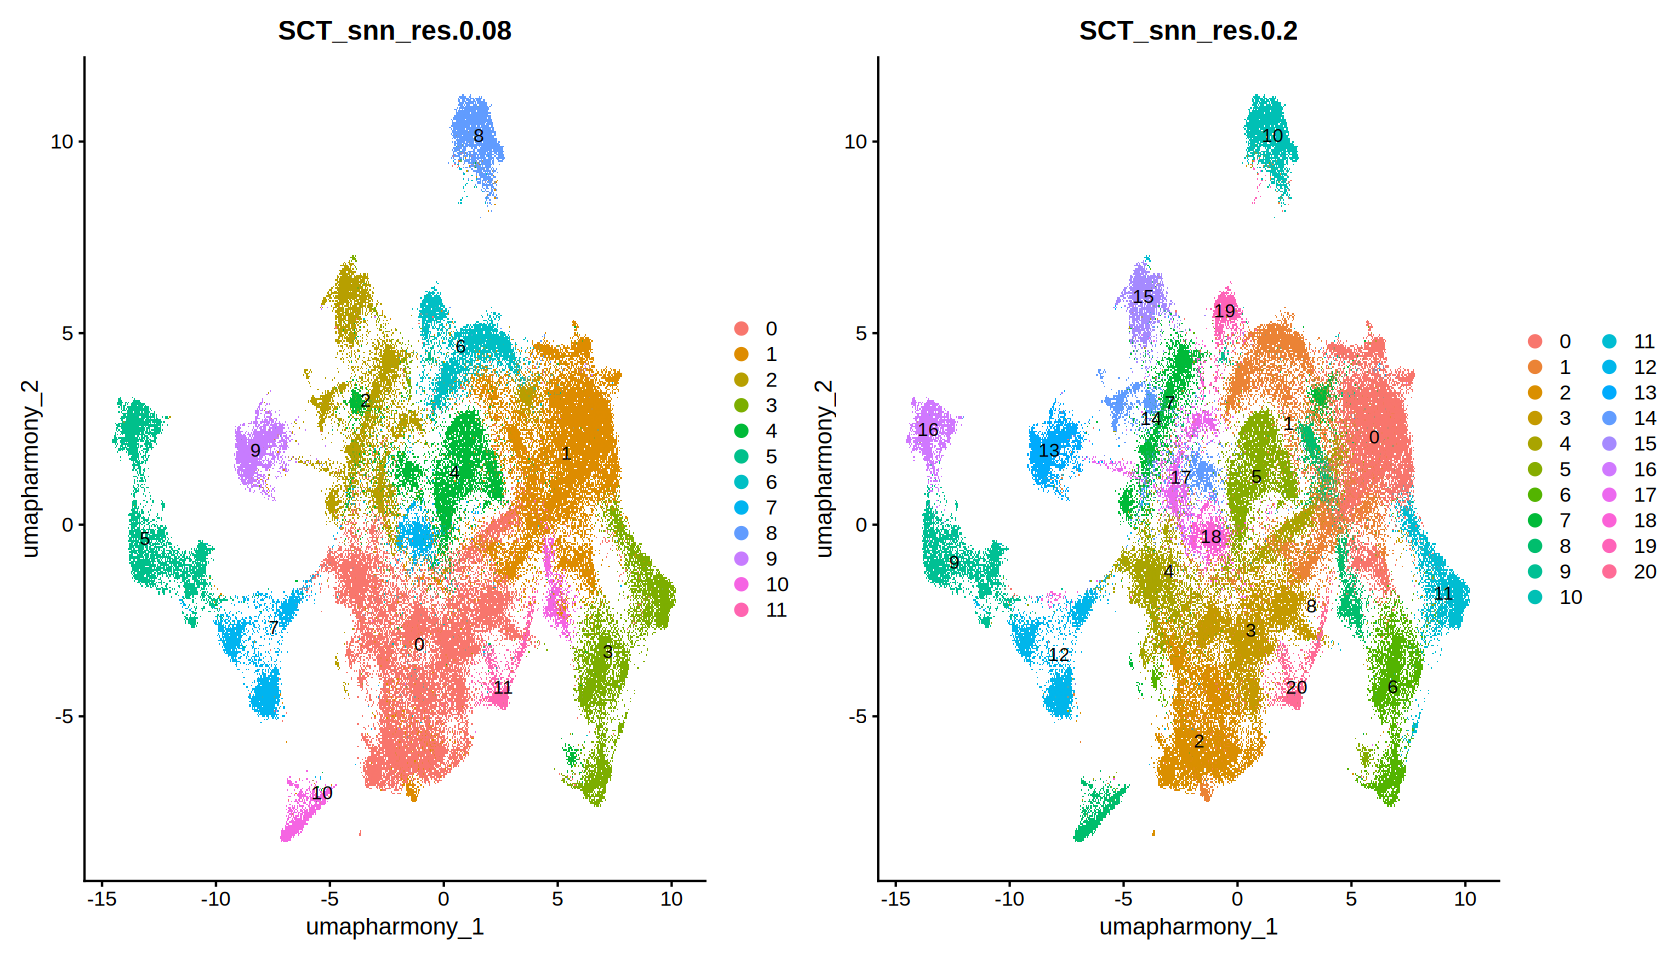

In [32]:
options(repr.plot.width = 14, repr.plot.height = 8)
p1 | p2

Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


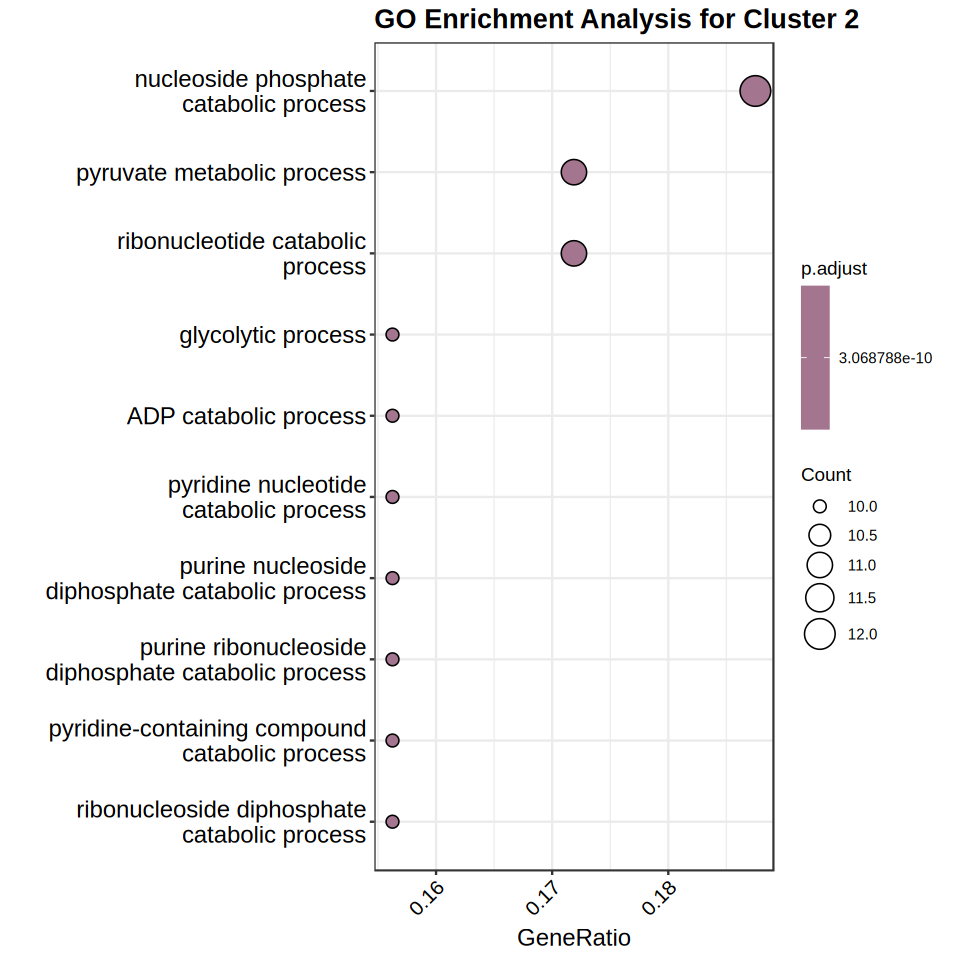

In [64]:
# Visualize GO results
options(repr.plot.width = 8, repr.plot.height = 8)
dotplot(go_result, showCategory = 10) + 
    ggtitle("GO Enrichment Analysis for Cluster 2") +
    theme(plot.title = element_text(size = 16, face = "bold"),
          axis.text.y = element_text(size = 14),
          axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
          axis.title = element_text(size = 14)) +
    scale_size(range = c(3, 8))